In [7]:
# File system and display
import os
import shutil
import cv2
import matplotlib.pyplot as plt

# Data handling
import pandas as pd
import numpy as np

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Check GPU availability
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


Torch version: 2.6.0+cu124
CUDA available: True


In [5]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existin

In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
# Define dataset path
dataset_path = "/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset"

# List contents to verify structure
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    


Traffic Dataset/
  labels/
    val/
    train/
  images/
    val/
    test/
    train/


### preprocessing step


In [8]:
img_dir = "/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train"
label_dir = "/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels/train"

image_files = sorted([f[:-4] for f in os.listdir(img_dir) if f.endswith('.jpg') or f.endswith('.png')])
label_files = sorted([f[:-4] for f in os.listdir(label_dir) if f.endswith('.txt')])

print(f"Images: {len(image_files)}, Labels: {len(label_files)}")

missing_labels = set(image_files) - set(label_files)
print(f"Missing labels for: {missing_labels}")


Images: 738, Labels: 738
Missing labels for: set()


In [9]:
yaml_content = """
path: /kaggle/input/traffic-vehicles-object-detection
train: /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train
val: /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val

nc: 7
names: ['Car', 'Number Plate', 'Blur Number Plate', 'Two Wheeler', 'Auto', 'Bus', 'Truck']
"""

with open("data.yaml", "w") as f:
    f.write(yaml_content)

# Confirm it's written correctly
!cat data.yaml



path: /kaggle/input/traffic-vehicles-object-detection
train: /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train
val: /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val

nc: 7
names: ['Car', 'Number Plate', 'Blur Number Plate', 'Two Wheeler', 'Auto', 'Bus', 'Truck']


In [10]:
!find . -name "data.yaml"


./data.yaml


In [1]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')  # or yolov8m.pt
model.train(
    data='data.yaml',
    epochs=30,
    imgsz=640,
    project='runs/train',     # ✅ Ensures it's saved under runs/train/
    name='vehicle_yolov8',    # ✅ Makes folder runs/train/vehicle_yolov8
    exist_ok=True
)


Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=vehicle_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

train: Scanning /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels/train... 735 images, 6 backgrounds, 3 corrupt: 100%|██████████| 738/738 [00:03<00:00, 200.72it/s]

train: /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (453).jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (453).jpg'
train: /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (837).jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (837).jpg'
train: /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (857).jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/train/00 (857).jpg'
WARNING ⚠️ train: Cache directory /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 17.5±12.6 MB/s, size: 119.3 KB)


val: Scanning /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels/val... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:01<00:00, 170.87it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels is not writeable, cache not saved.


Plotting labels to runs/train/vehicle_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/train/vehicle_yolov8
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.56G     0.9924      1.504      1.016        414        640: 100%|██████████| 46/46 [00:29<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        185       1980      0.556      0.616      0.579      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.63G     0.9352     0.8348     0.9948        283        640: 100%|██████████| 46/46 [00:28<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        185       1980      0.517      0.626      0.577      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       7.7G     0.9387     0.7667     0.9852        297        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.83it/s]

                   all        185       1980      0.619      0.588      0.601      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.77G     0.9465     0.7231      0.995        383        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.84it/s]

                   all        185       1980        0.7      0.572      0.658      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.83G     0.9207     0.6936     0.9882        382        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        185       1980      0.655      0.669      0.673      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       7.9G     0.9086     0.6624     0.9795        341        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  3.00it/s]

                   all        185       1980      0.734      0.662      0.746      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.96G     0.9053      0.662     0.9752        226        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]

                   all        185       1980      0.647      0.661      0.677      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.87G     0.8892     0.6283     0.9736        462        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        185       1980       0.78       0.59      0.707      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.89G     0.8691     0.6114     0.9638        311        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]

                   all        185       1980      0.777      0.662       0.76        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.96G     0.8608      0.583     0.9639        365        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]

                   all        185       1980      0.786      0.641      0.744      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.02G     0.8577     0.5794     0.9592        379        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]

                   all        185       1980      0.742      0.696      0.774      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.89G     0.8501      0.584     0.9517        431        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]

                   all        185       1980      0.807      0.656      0.762      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.96G     0.8217     0.5438     0.9411        247        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]

                   all        185       1980      0.708      0.731      0.786      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.85G     0.8244     0.5377     0.9427        340        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.92it/s]

                   all        185       1980      0.703      0.761      0.791      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.92G     0.8118     0.5198      0.939        290        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        185       1980      0.739      0.756      0.803       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.99G     0.7979     0.5012     0.9324        333        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        185       1980      0.765      0.734      0.784       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.13G     0.8062     0.5037     0.9374        451        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        185       1980       0.73      0.765      0.798      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.87G     0.7877      0.498     0.9247        348        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        185       1980      0.782      0.737      0.811      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.94G     0.7743     0.4907     0.9221        330        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        185       1980      0.814      0.753      0.822      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.77G     0.7654     0.4738     0.9235        382        640: 100%|██████████| 46/46 [00:28<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]

                   all        185       1980      0.727      0.748      0.783      0.544


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       7.8G     0.7705     0.4707     0.9159        158        640: 100%|██████████| 46/46 [00:29<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        185       1980      0.811      0.677      0.771      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.87G     0.7693     0.4567     0.9121        123        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]

                   all        185       1980      0.759      0.768      0.795      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.94G     0.7597     0.4442     0.9059        191        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        185       1980      0.663      0.773      0.785      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.03G     0.7502      0.435     0.8997        158        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]

                   all        185       1980      0.752      0.784      0.819      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.16G      0.741     0.4254     0.8939        154        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

                   all        185       1980      0.743      0.771      0.809      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.08G     0.7276     0.4083     0.8923        194        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        185       1980      0.734      0.777      0.789       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.15G     0.7159     0.4051     0.8895        253        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]

                   all        185       1980      0.804      0.746      0.806       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.07G     0.7155      0.402     0.8914        187        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]

                   all        185       1980      0.799      0.754      0.817      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.18G     0.7093     0.3889     0.8868        139        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        185       1980      0.795      0.765      0.815      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.07G      0.698     0.3799     0.8813        131        640: 100%|██████████| 46/46 [00:28<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        185       1980      0.792      0.771      0.822      0.583



30 epochs completed in 0.266 hours.
Optimizer stripped from runs/train/vehicle_yolov8/weights/last.pt, 52.0MB
Optimizer stripped from runs/train/vehicle_yolov8/weights/best.pt, 52.0MB

Validating runs/train/vehicle_yolov8/weights/best.pt...
Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        185       1980      0.791       0.77      0.822      0.583
                   Car        159       1061      0.869      0.924       0.95      0.803
          Number Plate        104        174      0.707      0.874      0.855      0.538
     Blur Number Plate         80        161      0.884      0.484        0.7      0.387
           Two Wheeler         88        271      0.846      0.894      0.919       0.68
                  Auto         44         94      0.679      0.698      0.719      0.415
                   Bus         93        110      0.777      0.818       0.84      0.649
                 Truck         55        109      0.777      0.697      0.773       0.61
Speed: 0.1ms preprocess, 8.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/train/vehicle_yolov8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78449e2c0a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [2]:
!ls runs/train/
!ls runs/train/*/weights/


vehicle_yolov8
best.pt  last.pt


In [3]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('runs/train/vehicle_yolov8/weights/best.pt')

# Run prediction on validation images
model.predict(
    source='/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val',
    save=True,
    save_txt=True,
    conf=0.25,
    project='runs/predict',
    name='val_results',
    exist_ok=True
)



image 1/185 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val/00 (106).jpg: 640x384 3 Cars, 1 Number Plate, 1 Bus, 2 Trucks, 43.2ms
image 2/185 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val/00 (107).jpg: 640x384 4 Cars, 1 Number Plate, 1 Two Wheeler, 1 Bus, 1 Truck, 14.0ms
image 3/185 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val/00 (108).jpg: 640x384 3 Cars, 2 Number Plates, 1 Two Wheeler, 1 Bus, 1 Truck, 14.0ms
image 4/185 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val/00 (109).jpg: 640x384 4 Cars, 1 Number Plate, 1 Two Wheeler, 1 Bus, 14.1ms
image 5/185 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val/00 (110).jpg: 640x384 4 Cars, 1 Blur Number Plate, 1 Two Wheeler, 1 Bus, 2 Trucks, 14.1ms
image 6/185 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/val/00 (111).jpg: 640x384 4 Cars, 1 Blur Number Plate, 1 Bus, 14.0ms
image 7/

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Car', 1: 'Number Plate', 2: 'Blur Number Plate', 3: 'Two Wheeler', 4: 'Auto', 5: 'Bus', 6: 'Truck'}
 obb: None
 orig_img: array([[[221, 208, 194],
         [221, 208, 194],
         [221, 208, 194],
         ...,
         [  5,  37,  20],
         [  5,  37,  20],
         [  5,  37,  20]],
 
        [[221, 208, 194],
         [221, 208, 194],
         [221, 208, 194],
         ...,
         [  5,  37,  20],
         [  5,  37,  20],
         [  5,  37,  20]],
 
        [[221, 208, 194],
         [221, 208, 194],
         [221, 208, 194],
         ...,
         [  5,  37,  20],
         [  5,  37,  20],
         [  5,  37,  20]],
 
        ...,
 
        [[ 46,  46,  46],
         [ 44,  44,  44],
         [ 42,  42,  42],
         ...,
         [ 15,  57,  50],
         [ 13,  55,  48],
         [ 17,  59,  52]],
 
        [[ 48,  48,

# ### evaluation on updated model

In [4]:
metrics = model.val()

Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.2±0.4 ms, read: 290.7±278.4 MB/s, size: 262.9 KB)


val: Scanning /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels/val... 185 images, 1 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<00:00, 708.24it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.76it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        185       1980      0.794      0.773      0.823      0.585
                   Car        159       1061      0.868      0.925       0.95      0.804
          Number Plate        104        174      0.711      0.876      0.855      0.539
     Blur Number Plate         80        161      0.887      0.486      0.689      0.391
           Two Wheeler         88        271      0.849      0.894       0.92       0.68
                  Auto         44         94       0.69      0.709      0.742      0.426
                   Bus         93        110      0.777      0.818      0.836      0.646
                 Truck         55        109      0.776      0.701      0.768      0.605
Speed: 1.7ms preprocess, 11.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val


In [5]:
# Get scalar values from the metrics object
precision = metrics.box.mp
recall = metrics.box.mr
map50 = metrics.box.map50
map5095 = metrics.box.map         # mAP@0.5:0.95

# Compute F1 Score
f1 = 2 * (precision * recall) / (precision + recall + 1e-6)

# Print the results
print(f"Precision:      {precision:.3f}")
print(f"Recall:         {recall:.3f}")
print(f"F1 Score:       {f1:.3f}")
print(f"mAP@0.5:        {map50:.3f}")
print(f"mAP@0.5:0.95:   {map5095:.3f}")


Precision:      0.794
Recall:         0.773
F1 Score:       0.783
mAP@0.5:        0.823
mAP@0.5:0.95:   0.585


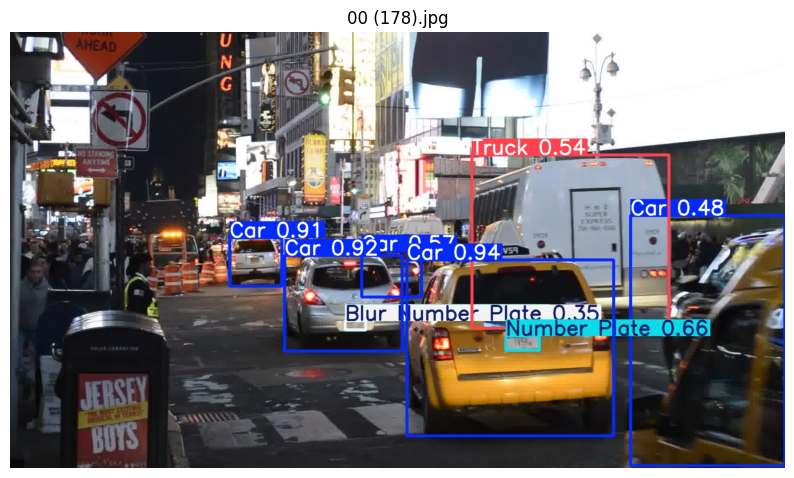

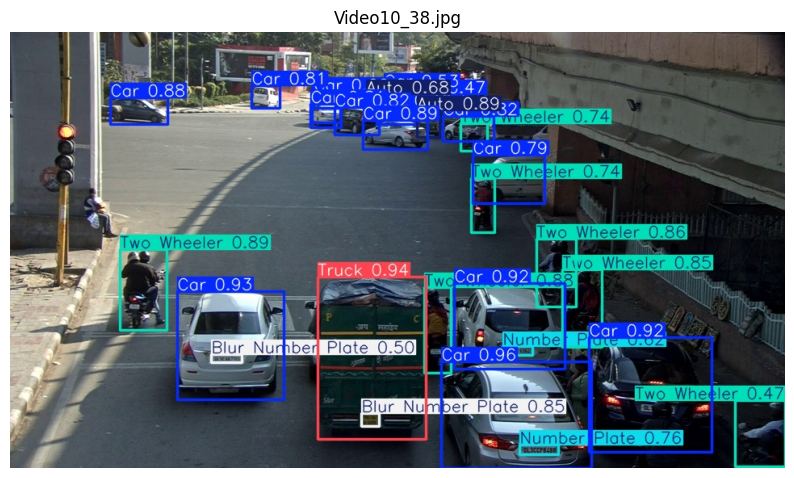

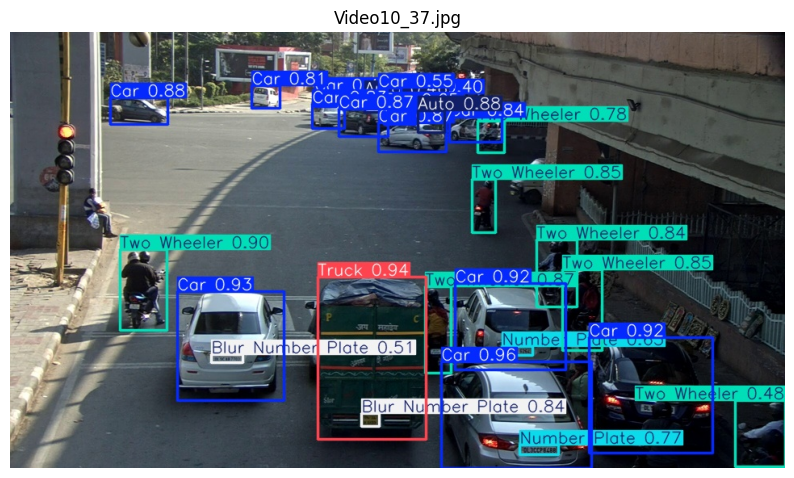

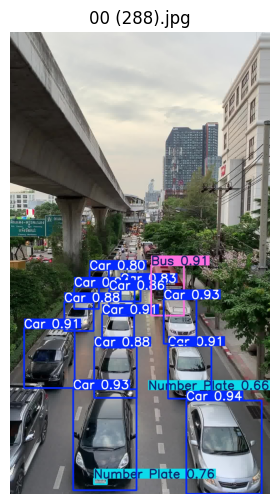

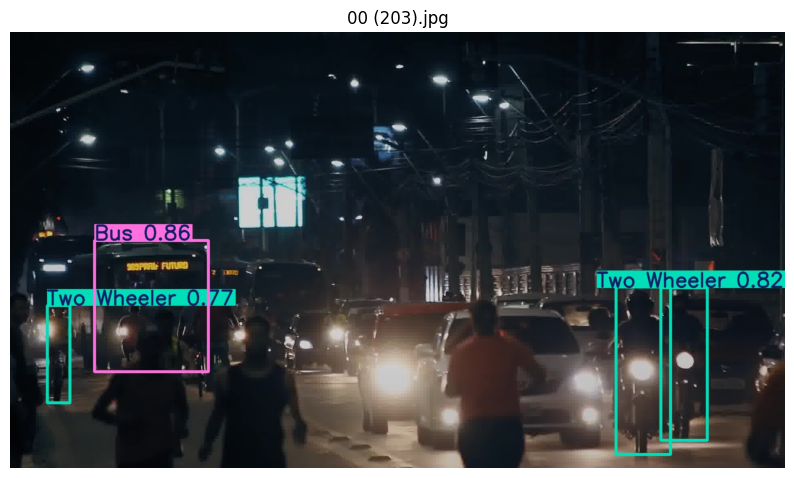

In [8]:
# Path to the predicted images
folder_path = 'runs/predict/val_results'
# Load and display a few images
sample_files = os.listdir(folder_path)[:5]  # Show first 5 images

for file in sample_files:
    if file.endswith('.jpg') or file.endswith('.png'):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.title(file)
        plt.axis('off')
        plt.show()

# **### predict label for test data

In [9]:
import cv2
from pathlib import Path

test_folder = Path("/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/test")
image_exts = ['.jpg', '.jpeg', '.png']
video_exts = ['.mp4', '.avi', '.mov', '.mkv']

image_count = 0
txt_expected = 0
frame_skip = 10

for file_path in test_folder.iterdir():
    if file_path.suffix.lower() in image_exts:
        image_count += 1
        txt_expected += 1  # one per image
    elif file_path.suffix.lower() in video_exts:
        cap = cv2.VideoCapture(str(file_path))
        frame_total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.release()
        frame_processed = frame_total // frame_skip
        txt_expected += frame_processed

print(f"🖼️ Images found: {image_count}")
print(f"🎞️ Estimated .txt label files (with frame skipping): {txt_expected}")


🖼️ Images found: 260
🎞️ Estimated .txt label files (with frame skipping): 894


In [17]:

from ultralytics import YOLO
import cv2
from pathlib import Path
import shutil


# ✅ Define folders
test_folder = Path("/kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/test")
save_dir = Path("runs/predict/test_results")
label_dir = save_dir / "labels"
image_out_dir = save_dir / "images"
video_out_dir = save_dir / "videos"

# 🧹 Clean and create output directories
shutil.rmtree(save_dir, ignore_errors=True)
label_dir.mkdir(parents=True, exist_ok=True)
image_out_dir.mkdir(parents=True, exist_ok=True)
video_out_dir.mkdir(parents=True, exist_ok=True)

# ✅ Supported extensions
image_exts = ['.jpg', '.jpeg', '.png']
video_exts = ['.mp4', '.avi', '.mov', '.mkv']
frame_skip = 3  # ⬅️ More frequent frames for smoother video

# ✅ Counters
image_count = 0
video_frame_count = 0
txt_expected = 0

# ✅ Process all files in test folder
for file_path in test_folder.iterdir():
    if file_path.suffix.lower() in image_exts:
        image_count += 1
        txt_expected += 1

        results = model.predict(
            source=str(file_path),
            conf=0.25,
            imgsz=640,
            save=False
        )

        # Save annotated image
        out_img = results[0].plot()
        image_out_path = image_out_dir / file_path.name
        cv2.imwrite(str(image_out_path), out_img)

        # Save label file
        label_path = label_dir / f"{file_path.stem}.txt"
        with open(label_path, "w") as f:
            for box in results[0].boxes:
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                x, y, w, h = box.xywh[0]
                f.write(f"{cls} {x} {y} {w} {h} {conf:.4f}\n")

        del results

    elif file_path.suffix.lower() in video_exts:
        cap = cv2.VideoCapture(str(file_path))
        fps = cap.get(cv2.CAP_PROP_FPS)
        if not fps or fps == 0:
            fps = 24  # fallback FPS
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        out_video_path = video_out_dir / f"{file_path.stem}_detected.mp4"
        out_video = None  # Lazy init

        frame_num = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame_num += 1
            if frame_num % frame_skip != 0:
                continue

            video_frame_count += 1
            txt_expected += 1

            # Resize for model
            resized = cv2.resize(frame, (640, 640))
            results = model.predict(
                source=resized,
                conf=0.25,
                imgsz=640,
                save=False
            )

            # Plot detection (even if empty)
            plotted = results[0].plot()
            plotted_resized = cv2.resize(plotted, (width, height))

            # Initialize writer
            if out_video is None:
                out_video = cv2.VideoWriter(
                    str(out_video_path),
                    cv2.VideoWriter_fourcc(*'mp4v'),
                    fps,
                    (width, height)
                )

            out_video.write(plotted_resized)

            # Save label only if detection exists
            if len(results[0].boxes) > 0:
                label_path = label_dir / f"{file_path.stem}_frame{frame_num}.txt"
                with open(label_path, "w") as f:
                    for box in results[0].boxes:
                        cls = int(box.cls[0])
                        conf = float(box.conf[0])
                        x, y, w, h = box.xywh[0]
                        f.write(f"{cls} {x} {y} {w} {h} {conf:.4f}\n")

            del results

        cap.release()
        if out_video:
            out_video.release()

# ✅ Count actual saved .txt labels
txt_actual = len(list(label_dir.glob("*.txt")))

# ✅ Report summary
print("✅ Object Detection Completed")
print(f"🖼️  Images processed: {image_count}")
print(f"🎞️  Video frames processed: {video_frame_count} (every {frame_skip}th frame)")
print(f"📄 Expected .txt files: {txt_expected}")
print(f"📁 Actual .txt files saved: {txt_actual}")

if txt_expected == txt_actual:
    print("✅ All labels saved correctly.")
else:
    print("⚠️ Label count mismatch. Check missing or extra files.")



image 1/1 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/test/00 (10).png: 640x640 3 Cars, 1 Number Plate, 2 Two Wheelers, 17.2ms
Speed: 3.0ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/predict/test_results
1 label saved to runs/predict/test_results/labels

image 1/1 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/test/00 (7).png: 608x640 4 Cars, 1 Number Plate, 15.5ms
Speed: 2.4ms preprocess, 15.5ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs/predict/test_results
2 labels saved to runs/predict/test_results/labels

image 1/1 /kaggle/input/traffic-vehicles-object-detection/Traffic Dataset/images/test/00 (308).jpg: 640x384 13 Cars, 2 Number Plates, 1 Blur Number Plate, 2 Two Wheelers, 1 Bus, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/predict/test_results


In [19]:

txt_dir = 'runs/predict/test_results/labels'
txt_files = os.listdir(txt_dir)
print(f"🔍 Number of .txt prediction files: {len(txt_files)}")


🔍 Number of .txt prediction files: 2338
